In [1]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import itertools
import numpy as np
from matplotlib import pyplot as plt

In [2]:
uri = "localhost:27017"
client = MongoClient(uri, server_api=ServerApi('1'))

client.admin.command('ping')

db = client.test
historical_evolution_data = db.historicalEvolutionData
problem_instances = db.probleminstances
db_prelim_information = db.prelimInformation

generator_colors = {
    "SimpleGenerator" : "orange",
    "RealisticGenerator" : "blue",
    "LocalSearchController" : "green"
}

generators_alternative_names = {
    "SimpleGenerator" : "mk_s",
    "RealisticGenerator" : "mk_r",
    "LocalSearchController" : "ls"
}

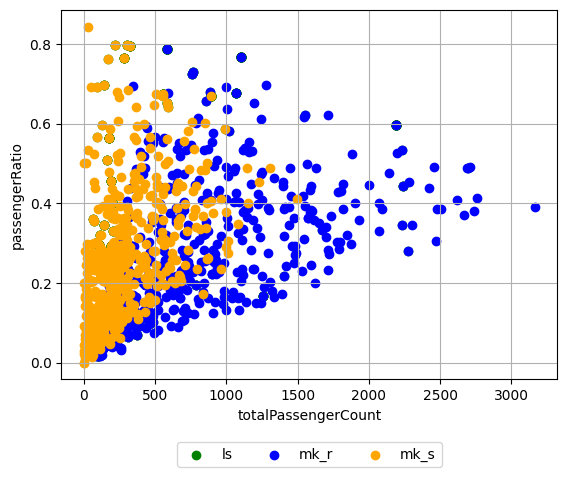

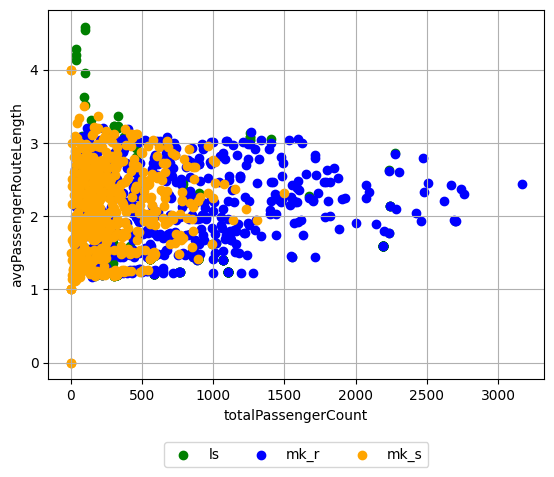

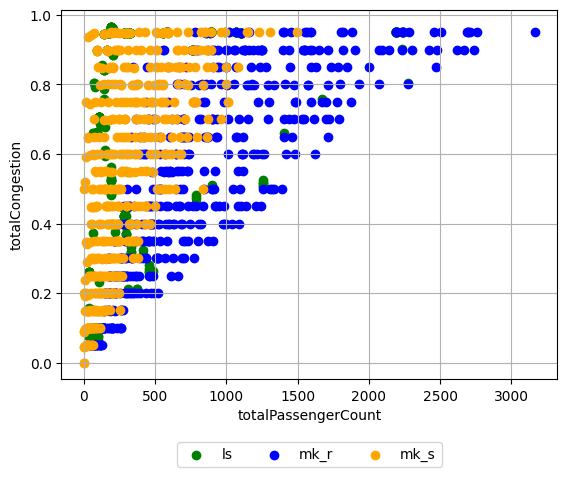

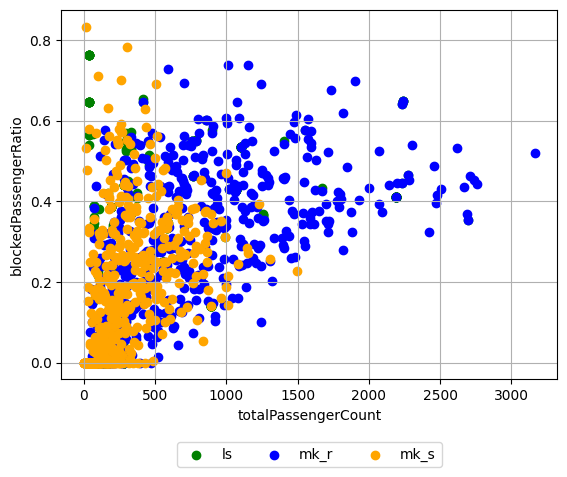

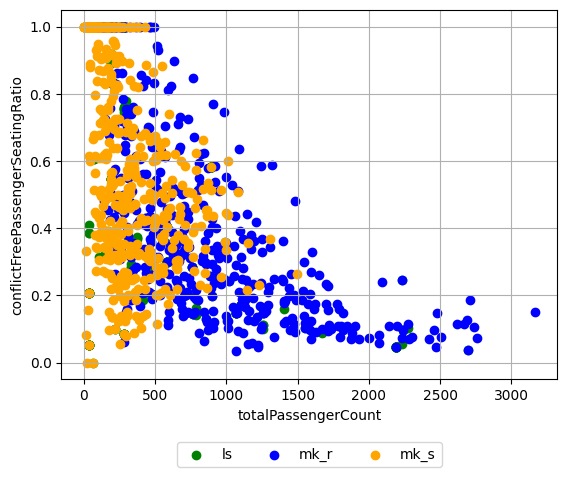

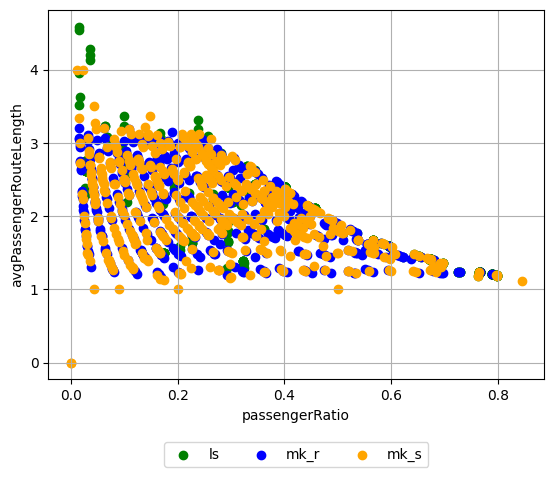

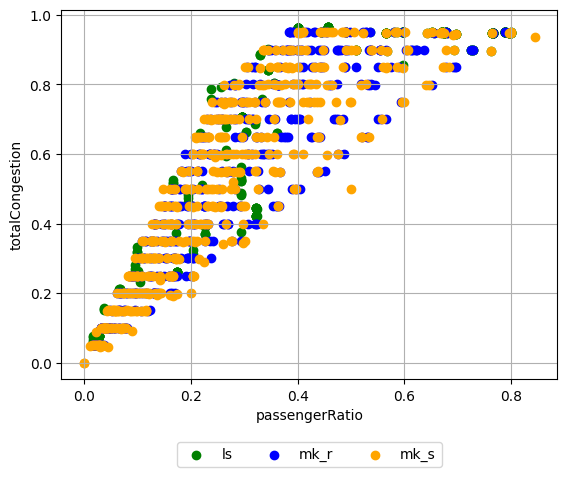

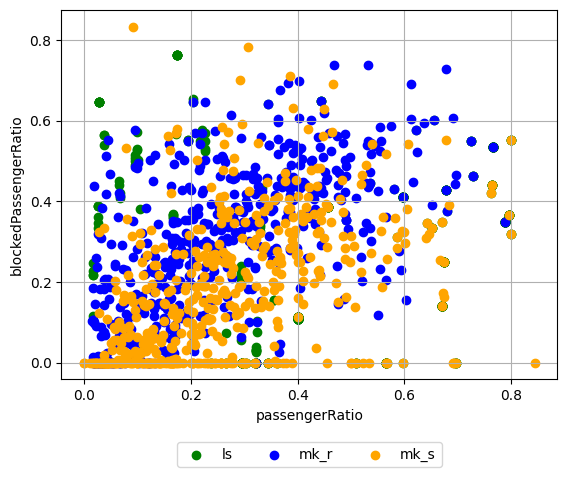

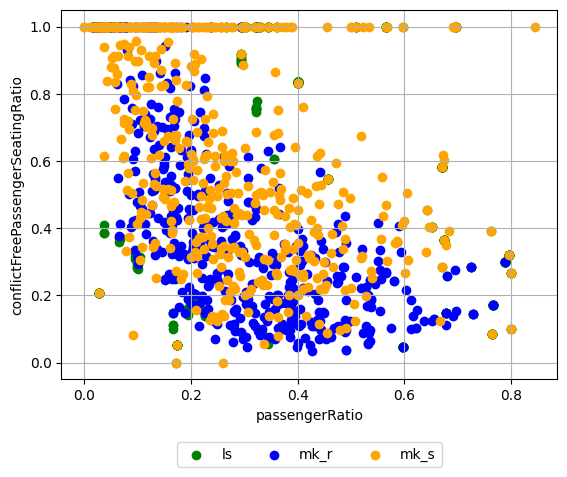

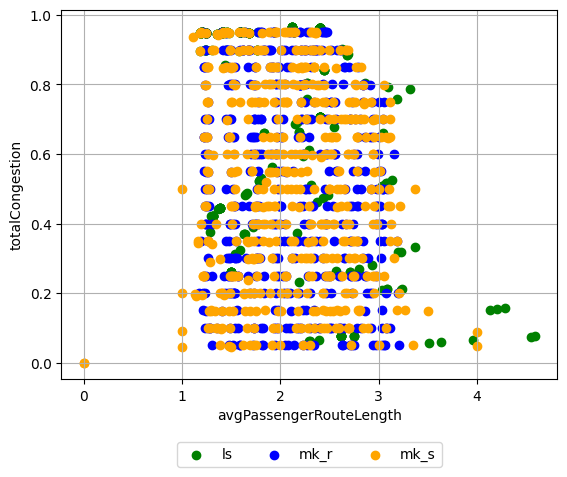

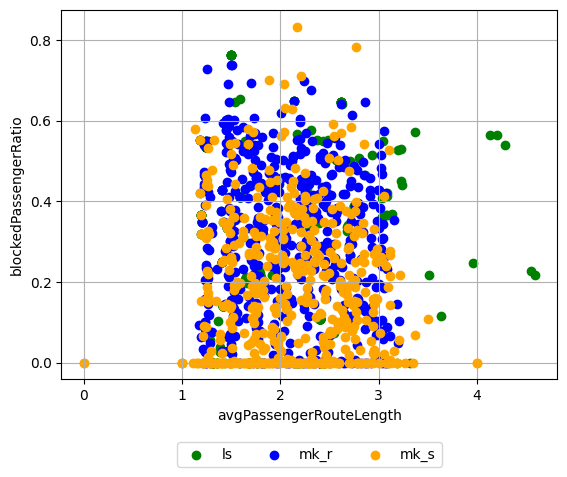

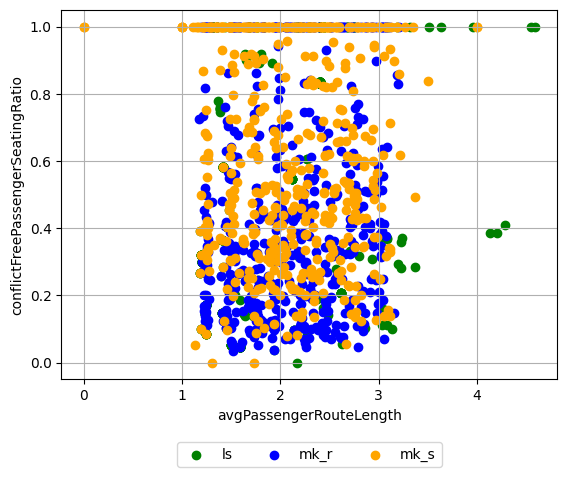

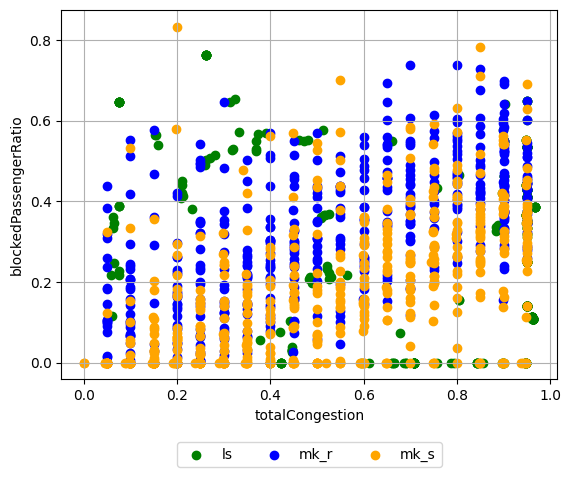

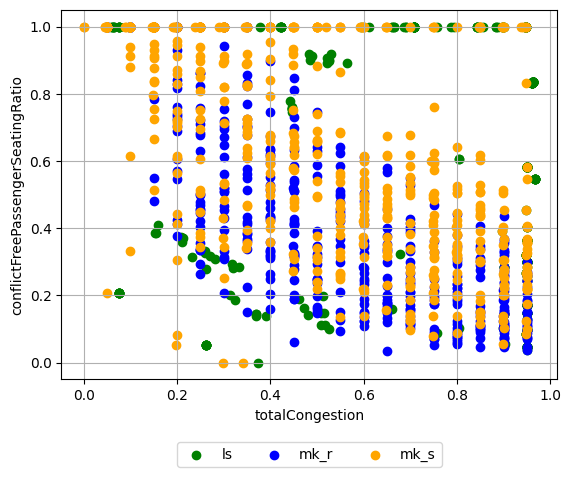

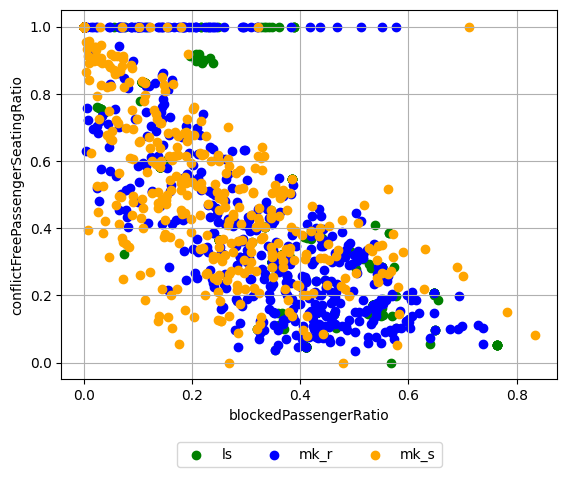

In [3]:
def plot_feature_combination(instances, feature_1, feature_2, colored_by_generator = False, label_active = False):
    if colored_by_generator:
        instances.sort(key = lambda x: x["source"])
        grouped_instances_by_source = itertools.groupby(instances, key= lambda x: x["source"])
        for key, group in grouped_instances_by_source:
            grouped_instances = list(group)
            x_coords = [instance["featureDescription"][feature_1] for instance in grouped_instances]
            y_coords = [instance["featureDescription"][feature_2] for instance in grouped_instances]
            plt.scatter(x_coords, y_coords, label=generators_alternative_names[key], color=generator_colors[key])
    else:
        x_coords = [instance["featureDescription"][feature_1] for instance in instances]
        y_coords = [instance["featureDescription"][feature_2] for instance in instances]
        plt.scatter(x_coords, y_coords)

    plt.xlabel(feature_1)
    plt.ylabel(feature_2)

    source_count = len(set(list(map(lambda x: x["source"], instances))))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol = source_count)
    
    plt.grid()
    plt.show()

experiment_id = "27-09-1000"
instances = list(problem_instances.find({"experimentId" : experiment_id}))
feature_names = ["totalPassengerCount", "passengerRatio", "avgPassengerRouteLength", "totalCongestion", "blockedPassengerRatio", "conflictFreePassengerSeatingRatio"]
feature_combinations = list(itertools.combinations(feature_names, 2))

for combination in feature_combinations:
    plot_feature_combination(instances, combination[0], combination[1], colored_by_generator = True)

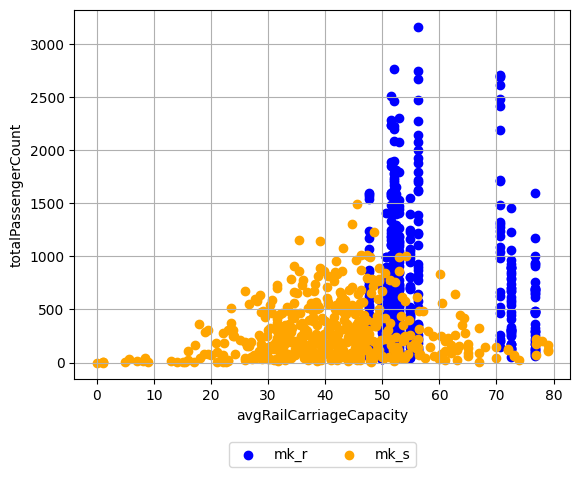

In [4]:
feature_names = ["totalPassengerCount","passengerRatio","avgPassengerRouteLength", "totalCongestion"]

plot_feature_combination(instances, "avgRailCarriageCapacity", "totalPassengerCount", colored_by_generator = True, label_active = True)

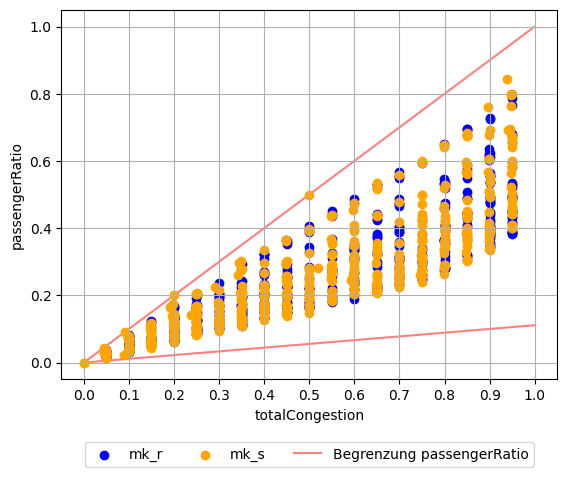

In [9]:
def min_passenger_ratio(x):
   return x / 9

def max_passenger_ratio(x):
   return x

def plot_passenger_ratio_total_congestion(instances, feature_2 = "passengerRatio", feature_1 = "totalCongestion", colored_by_generator = False, label_active = False):
    
    if colored_by_generator:
        instances.sort(key = lambda x: x["source"])
        grouped_instances_by_source = itertools.groupby(instances, key= lambda x: x["source"])
        for key, group in grouped_instances_by_source:
            grouped_instances = list(group)
            x_coords = [instance["featureDescription"][feature_1] for instance in grouped_instances]
            y_coords = [instance["featureDescription"][feature_2] for instance in grouped_instances]
            plt.scatter(x_coords, y_coords, label=generators_alternative_names[key], color=generator_colors[key])
    else:
        x_coords = [instance["featureDescription"][feature_1] for instance in instances]
        y_coords = [instance["featureDescription"][feature_2] for instance in instances]
        plt.scatter(x_coords, y_coords)

    x = np.linspace(0, 1.0, 100)
    plt.plot(x, min_passenger_ratio(x), color='red', alpha=0.5,zorder=0, label= "Begrenzung passengerRatio")
    plt.plot(x, max_passenger_ratio(x), color='red', alpha=0.5,zorder=0)
    
    plt.xlabel(feature_1)
    
    plt.ylabel(feature_2)
    plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

    source_count = len(set(list(map(lambda x: x["source"], instances))))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol = source_count+1)
    
    plt.grid()
    plt.show()

plot_passenger_ratio_total_congestion(instances, colored_by_generator = True, label_active = True)


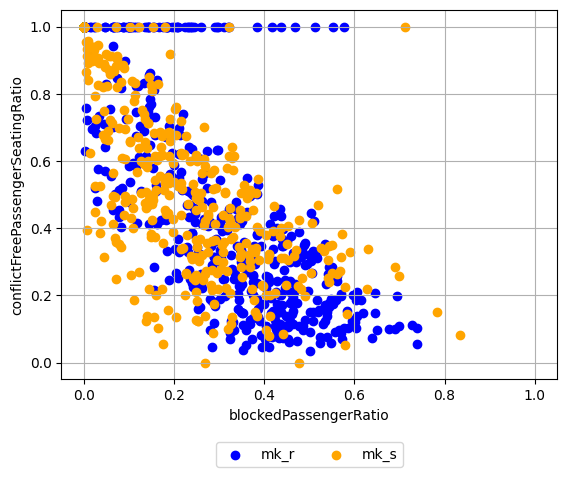

249


In [10]:
def plot_blocked_conflictfree(instances, feature_1 = "blockedPassengerRatio", feature_2 = "conflictFreePassengerSeatingRatio", colored_by_generator = False, label_active = False):
    if colored_by_generator:
        instances.sort(key = lambda x: x["source"])
        grouped_instances_by_source = itertools.groupby(instances, key= lambda x: x["source"])
        for key, group in grouped_instances_by_source:
            grouped_instances = list(group)
            x_coords = [instance["featureDescription"][feature_1] for instance in grouped_instances]
            y_coords = [instance["featureDescription"][feature_2] for instance in grouped_instances]
            plt.scatter(x_coords, y_coords, label=generators_alternative_names[key], color=generator_colors[key])
    else:
        x_coords = [instance["featureDescription"][feature_1] for instance in instances]
        y_coords = [instance["featureDescription"][feature_2] for instance in instances]
        plt.scatter(x_coords, y_coords)

    plt.xlabel(feature_1)
    plt.ylabel(feature_2)

    plt_xlim = [-0.05,1.05]
    plt_ylim = [-0.05,1.05]

    plt.xlim(plt_xlim)
    plt.ylim(plt_ylim)

    source_count = len(set(list(map(lambda x: x["source"], instances))))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol = source_count)
    
    plt.grid()
    plt.show()


plot_blocked_conflictfree(instances, colored_by_generator = True, label_active = True)

filtered = list(filter(lambda x: x["featureDescription"]["conflictFreePassengerSeatingRatio"] == 1.0, instances))
print(len(filtered))